<a href="https://colab.research.google.com/github/ashwinsathish/genre-prediction/blob/main/music_genre_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import mean_squared_error


import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('music_genre.csv')

In [ ]:
data

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.94100,0.792000,A#,0.1150,-5.201,Minor,0.0748,100.889,4-Apr,0.7590,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.89000,0.950000,D,0.1240,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.5310,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.75500,0.011800,G#,0.5340,-4.617,Major,0.0345,127.994,4-Apr,0.3330,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.70000,0.002530,C#,0.1570,-4.498,Major,0.2390,128.014,4-Apr,0.2700,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.58700,0.909000,F#,0.1570,-6.266,Major,0.0413,145.036,4-Apr,0.3230,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42133,52770.0,Akira Kosemura,DNA,40.0,0.99100,0.523,316000.0,0.26800,0.891000,D,0.0850,-17.405,Major,0.0362,152.236,3-Apr,0.7310,Classical
42134,53827.0,Richard Strauss,"Arabella, Op. 79, TrV 263, Act II: Sie sehn ni...",0.0,0.91300,0.222,357000.0,0.14900,0.000019,A#,0.4040,-21.393,Minor,0.0660,84.55,4-Apr,0.1130,Classical
42135,28992.0,Robert Schumann,"Kinderszenen, Op.15: 12. Kind im Einschlummern",41.0,0.99400,0.436,143027.0,0.00345,0.958000,E,0.0686,-39.971,Minor,0.0564,60.028,4-Apr,0.1020,Classical
42136,25864.0,Giacomo Puccini,"Madame Butterfly, SC 74, Act 2: ""Coro a bocca ...",0.0,0.98600,0.183,194280.0,0.00352,0.957000,A#,0.1290,-38.472,Major,0.0424,71.523,3-Apr,0.0487,Classical


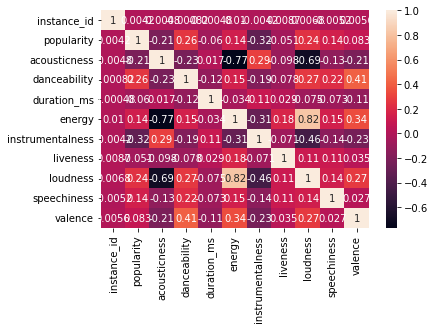

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(figsize=(100,100))
sns.heatmap(data.corr(),annot=True)

In [ ]:
data.columns

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'],
      dtype='object')

In [ ]:
data.dtypes

instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object

In [ ]:
data['music_genre'].value_counts()

Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      2132
Name: music_genre, dtype: int64

In [ ]:
data.isna().sum()

instance_id         5
artist_name         5
track_name          6
popularity          6
acousticness        6
danceability        6
duration_ms         6
energy              6
instrumentalness    6
key                 6
liveness            6
loudness            6
mode                6
speechiness         6
tempo               6
obtained_date       6
valence             6
music_genre         6
dtype: int64

In [ ]:
columns = ['key','mode','tempo']
for column in columns:
    print(data[column].unique())

['A#' 'D' 'G#' 'C#' 'F#' 'B' 'G' 'F' 'A' 'C' 'E' 'D#' nan]
['Minor' 'Major' nan]
['100.889' '115.00200000000001' '127.994' ... '84.55' '60.028' '71.523']


In [ ]:
data = data.dropna(axis=0)
data

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.94100,0.792000,A#,0.1150,-5.201,Minor,0.0748,100.889,4-Apr,0.7590,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.89000,0.950000,D,0.1240,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.5310,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.75500,0.011800,G#,0.5340,-4.617,Major,0.0345,127.994,4-Apr,0.3330,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.70000,0.002530,C#,0.1570,-4.498,Major,0.2390,128.014,4-Apr,0.2700,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.58700,0.909000,F#,0.1570,-6.266,Major,0.0413,145.036,4-Apr,0.3230,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42132,35965.0,Daniel Barenboim,"Bach, JS : Well-Tempered Clavier Book 1 : Prel...",28.0,0.99400,0.327,143720.0,0.07290,0.839000,E,0.0986,-25.418,Minor,0.0380,61.961000000000006,4-Apr,0.1050,Classical
42133,52770.0,Akira Kosemura,DNA,40.0,0.99100,0.523,316000.0,0.26800,0.891000,D,0.0850,-17.405,Major,0.0362,152.236,3-Apr,0.7310,Classical
42134,53827.0,Richard Strauss,"Arabella, Op. 79, TrV 263, Act II: Sie sehn ni...",0.0,0.91300,0.222,357000.0,0.14900,0.000019,A#,0.4040,-21.393,Minor,0.0660,84.55,4-Apr,0.1130,Classical
42135,28992.0,Robert Schumann,"Kinderszenen, Op.15: 12. Kind im Einschlummern",41.0,0.99400,0.436,143027.0,0.00345,0.958000,E,0.0686,-39.971,Minor,0.0564,60.028,4-Apr,0.1020,Classical


In [ ]:
test_df = data.copy()

In [ ]:
test_df = test_df.drop(['instance_id','artist_name','track_name','obtained_date'],axis=1)
test_df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.94100,0.792000,A#,0.1150,-5.201,Minor,0.0748,100.889,0.7590,Electronic
1,31.0,0.01270,0.622,218293.0,0.89000,0.950000,D,0.1240,-7.043,Minor,0.0300,115.00200000000001,0.5310,Electronic
2,28.0,0.00306,0.620,215613.0,0.75500,0.011800,G#,0.5340,-4.617,Major,0.0345,127.994,0.3330,Electronic
3,34.0,0.02540,0.774,166875.0,0.70000,0.002530,C#,0.1570,-4.498,Major,0.2390,128.014,0.2700,Electronic
4,32.0,0.00465,0.638,222369.0,0.58700,0.909000,F#,0.1570,-6.266,Major,0.0413,145.036,0.3230,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42132,28.0,0.99400,0.327,143720.0,0.07290,0.839000,E,0.0986,-25.418,Minor,0.0380,61.961000000000006,0.1050,Classical
42133,40.0,0.99100,0.523,316000.0,0.26800,0.891000,D,0.0850,-17.405,Major,0.0362,152.236,0.7310,Classical
42134,0.0,0.91300,0.222,357000.0,0.14900,0.000019,A#,0.4040,-21.393,Minor,0.0660,84.55,0.1130,Classical
42135,41.0,0.99400,0.436,143027.0,0.00345,0.958000,E,0.0686,-39.971,Minor,0.0564,60.028,0.1020,Classical


In [ ]:
test_df['mode'] = test_df['mode'].replace({'Minor' : 0, 'Major' : 1}) # one hot encoding
test_df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.94100,0.792000,A#,0.1150,-5.201,0,0.0748,100.889,0.7590,Electronic
1,31.0,0.01270,0.622,218293.0,0.89000,0.950000,D,0.1240,-7.043,0,0.0300,115.00200000000001,0.5310,Electronic
2,28.0,0.00306,0.620,215613.0,0.75500,0.011800,G#,0.5340,-4.617,1,0.0345,127.994,0.3330,Electronic
3,34.0,0.02540,0.774,166875.0,0.70000,0.002530,C#,0.1570,-4.498,1,0.2390,128.014,0.2700,Electronic
4,32.0,0.00465,0.638,222369.0,0.58700,0.909000,F#,0.1570,-6.266,1,0.0413,145.036,0.3230,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42132,28.0,0.99400,0.327,143720.0,0.07290,0.839000,E,0.0986,-25.418,0,0.0380,61.961000000000006,0.1050,Classical
42133,40.0,0.99100,0.523,316000.0,0.26800,0.891000,D,0.0850,-17.405,1,0.0362,152.236,0.7310,Classical
42134,0.0,0.91300,0.222,357000.0,0.14900,0.000019,A#,0.4040,-21.393,0,0.0660,84.55,0.1130,Classical
42135,41.0,0.99400,0.436,143027.0,0.00345,0.958000,E,0.0686,-39.971,0,0.0564,60.028,0.1020,Classical


In [ ]:
embarked_dummies = pd.get_dummies(test_df.key)
embarked_dummies

,A,A#,B,C,C#,D,D#,E,F,F#,G,G#
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
42132,0,0,0,0,0,0,0,1,0,0,0,0
42133,0,0,0,0,0,1,0,0,0,0,0,0
42134,0,1,0,0,0,0,0,0,0,0,0,0
42135,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
test_df = pd.concat([test_df, embarked_dummies], axis=1)
test_df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,B,C,C#,D,D#,E,F,F#,G,G#
0,27.0,0.00468,0.652,-1.0,0.94100,0.792000,A#,0.1150,-5.201,0,...,0,0,0,0,0,0,0,0,0,0
1,31.0,0.01270,0.622,218293.0,0.89000,0.950000,D,0.1240,-7.043,0,...,0,0,0,1,0,0,0,0,0,0
2,28.0,0.00306,0.620,215613.0,0.75500,0.011800,G#,0.5340,-4.617,1,...,0,0,0,0,0,0,0,0,0,1
3,34.0,0.02540,0.774,166875.0,0.70000,0.002530,C#,0.1570,-4.498,1,...,0,0,1,0,0,0,0,0,0,0
4,32.0,0.00465,0.638,222369.0,0.58700,0.909000,F#,0.1570,-6.266,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42132,28.0,0.99400,0.327,143720.0,0.07290,0.839000,E,0.0986,-25.418,0,...,0,0,0,0,0,1,0,0,0,0
42133,40.0,0.99100,0.523,316000.0,0.26800,0.891000,D,0.0850,-17.405,1,...,0,0,0,1,0,0,0,0,0,0
42134,0.0,0.91300,0.222,357000.0,0.14900,0.000019,A#,0.4040,-21.393,0,...,0,0,0,0,0,0,0,0,0,0
42135,41.0,0.99400,0.436,143027.0,0.00345,0.958000,E,0.0686,-39.971,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
test_df = test_df.drop('key',axis=1)
test_df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,B,C,C#,D,D#,E,F,F#,G,G#
0,27.0,0.00468,0.652,-1.0,0.94100,0.792000,0.1150,-5.201,0,0.0748,...,0,0,0,0,0,0,0,0,0,0
1,31.0,0.01270,0.622,218293.0,0.89000,0.950000,0.1240,-7.043,0,0.0300,...,0,0,0,1,0,0,0,0,0,0
2,28.0,0.00306,0.620,215613.0,0.75500,0.011800,0.5340,-4.617,1,0.0345,...,0,0,0,0,0,0,0,0,0,1
3,34.0,0.02540,0.774,166875.0,0.70000,0.002530,0.1570,-4.498,1,0.2390,...,0,0,1,0,0,0,0,0,0,0
4,32.0,0.00465,0.638,222369.0,0.58700,0.909000,0.1570,-6.266,1,0.0413,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42132,28.0,0.99400,0.327,143720.0,0.07290,0.839000,0.0986,-25.418,0,0.0380,...,0,0,0,0,0,1,0,0,0,0
42133,40.0,0.99100,0.523,316000.0,0.26800,0.891000,0.0850,-17.405,1,0.0362,...,0,0,0,1,0,0,0,0,0,0
42134,0.0,0.91300,0.222,357000.0,0.14900,0.000019,0.4040,-21.393,0,0.0660,...,0,0,0,0,0,0,0,0,0,0
42135,41.0,0.99400,0.436,143027.0,0.00345,0.958000,0.0686,-39.971,0,0.0564,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
test_df['tempo'] = test_df['tempo'].replace('?',np.nan)
test_df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,B,C,C#,D,D#,E,F,F#,G,G#
0,27.0,0.00468,0.652,-1.0,0.94100,0.792000,0.1150,-5.201,0,0.0748,...,0,0,0,0,0,0,0,0,0,0
1,31.0,0.01270,0.622,218293.0,0.89000,0.950000,0.1240,-7.043,0,0.0300,...,0,0,0,1,0,0,0,0,0,0
2,28.0,0.00306,0.620,215613.0,0.75500,0.011800,0.5340,-4.617,1,0.0345,...,0,0,0,0,0,0,0,0,0,1
3,34.0,0.02540,0.774,166875.0,0.70000,0.002530,0.1570,-4.498,1,0.2390,...,0,0,1,0,0,0,0,0,0,0
4,32.0,0.00465,0.638,222369.0,0.58700,0.909000,0.1570,-6.266,1,0.0413,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42132,28.0,0.99400,0.327,143720.0,0.07290,0.839000,0.0986,-25.418,0,0.0380,...,0,0,0,0,0,1,0,0,0,0
42133,40.0,0.99100,0.523,316000.0,0.26800,0.891000,0.0850,-17.405,1,0.0362,...,0,0,0,1,0,0,0,0,0,0
42134,0.0,0.91300,0.222,357000.0,0.14900,0.000019,0.4040,-21.393,0,0.0660,...,0,0,0,0,0,0,0,0,0,0
42135,41.0,0.99400,0.436,143027.0,0.00345,0.958000,0.0686,-39.971,0,0.0564,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
test_df["tempo"] = test_df["tempo"].astype("float")
test_df['tempo'] = test_df['tempo'].fillna(test_df['tempo'].mean())
test_df['tempo']

0        100.889
1        115.002
2        127.994
3        128.014
4        145.036
          ...   
42132     61.961
42133    152.236
42134     84.550
42135     60.028
42136     71.523
Name: tempo, Length: 42132, dtype: float64

In [ ]:
test_df['music_genre'] = test_df['music_genre'].replace({'Electronic':0, 'Anime':1, 'Jazz':2, 'Alternative':3, 'Country':4, 'Rap':5,
                                                   'Blues':5, 'Rock':6, 'Classical':7, 'Hip-Hop':8})
test_df['music_genre']

0        0
1        0
2        0
3        0
4        0
        ..
42132    7
42133    7
42134    7
42135    7
42136    7
Name: music_genre, Length: 42132, dtype: int64

In [ ]:
def preprocess_inputs(df):
    df = df.copy()
    
    df = df.drop(['instance_id','artist_name','track_name','obtained_date'],axis=1)

    df['mode'] = df['mode'].replace({'Minor' : 0,
                                     'Major' : 1}) # one hot encoding

    embarked_dummies = pd.get_dummies(df.key)
    df = pd.concat([df, embarked_dummies], axis=1)
    df = df.drop('key',axis=1)
    
    df['tempo'] = df['tempo'].replace('?',np.nan)
    df["tempo"] = df["tempo"].astype("float")
    df['tempo'] = df['tempo'].fillna(df['tempo'].mean())
     
    df['music_genre'] = df['music_genre'].replace({'Electronic':0, 'Anime':1, 'Jazz':2, 'Alternative':3, 'Country':4, 'Rap':5,
                                                   'Blues':5, 'Rock':6, 'Classical':7, 'Hip-Hop':8})    
    
    y = df['music_genre']
    X = df.drop('music_genre',axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, shuffle=True, random_state=43)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

X_train

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,B,C,C#,D,D#,E,F,F#,G,G#
35722,0.695409,-0.894969,-1.330786,0.254421,0.685307,-0.560018,-0.614382,0.913892,0.750605,-0.599752,...,-0.287319,-0.352074,-0.347186,-0.343350,-0.183405,-0.285216,3.241233,-0.256147,-0.357942,-0.269321
47351,0.438074,-0.490244,-0.728482,-0.586751,-0.278936,-0.559793,2.523664,0.182083,-1.332259,1.097496,...,-0.287319,-0.352074,-0.347186,-0.343350,-0.183405,-0.285216,-0.308525,-0.256147,-0.357942,-0.269321
31954,-0.591269,-0.175101,-0.377138,0.078435,0.417881,-0.500760,-0.394298,0.344922,-1.332259,-0.374899,...,-0.287319,-0.352074,-0.347186,-0.343350,-0.183405,-0.285216,-0.308525,-0.256147,-0.357942,-0.269321
24452,-0.205266,-0.871917,0.225166,-1.743968,0.323716,-0.557196,-0.524123,0.344922,0.750605,-0.332492,...,3.480449,-0.352074,-0.347186,-0.343350,-0.183405,-0.285216,-0.308525,-0.256147,-0.357942,-0.269321
21511,0.502408,-0.154675,0.894392,-0.094295,0.014857,-0.515190,1.707624,0.114368,0.750605,-0.611586,...,-0.287319,-0.352074,-0.347186,-0.343350,-0.183405,-0.285216,-0.308525,-0.256147,2.793749,-0.269321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25238,2.046422,-0.852950,-1.057518,-0.054265,0.741806,-0.560018,-0.768935,0.683821,-1.332259,-0.112570,...,-0.287319,-0.352074,2.880304,-0.343350,-0.183405,-0.285216,-0.308525,-0.256147,-0.357942,-0.269321
18453,0.052070,-0.428966,-1.358670,0.691708,-0.034108,-0.560018,-0.631692,0.265115,0.750605,-0.590876,...,-0.287319,2.840309,-0.347186,-0.343350,-0.183405,-0.285216,-0.308525,-0.256147,-0.357942,-0.269321
40758,-0.848605,1.934608,-0.895789,2.283691,-1.759199,2.261665,-0.722569,-1.000839,-1.332259,-0.546497,...,-0.287319,-0.352074,-0.347186,2.912477,-0.183405,-0.285216,-0.308525,-0.256147,-0.357942,-0.269321
19781,0.245072,-0.866957,1.647272,-1.743968,-0.395699,-0.557304,0.069361,-0.281606,-1.332259,1.058048,...,-0.287319,-0.352074,-0.347186,-0.343350,-0.183405,-0.285216,-0.308525,-0.256147,-0.357942,-0.269321


In [ ]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                    Bagging Classifier": BaggingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                    Bagging Classifier trained.


In [ ]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

                   Logistic Regression: 47.99%
                   K-Nearest Neighbors: 44.27%
                         Decision Tree: 43.51%
Support Vector Machine (Linear Kernel): 47.08%
   Support Vector Machine (RBF Kernel): 54.69%
                        Neural Network: 57.63%
                         Random Forest: 54.79%
                     Gradient Boosting: 58.12%
                    Bagging Classifier: 51.18%


In [ ]:
cv_method = StratifiedKFold(n_splits=3,random_state=42)

In [ ]:
scores_Logistic = cross_val_score(LogisticRegression(), X_train, y_train, cv =cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Logistic Regression model:\n{scores_Logistic}")
print(f"CrossValMeans: {round(scores_Logistic.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_Logistic.std(), 3)}")

Scores(Cross validate) for Logistic Regression model:
[0.48092912 0.47801491 0.47917024]
CrossValMeans: 0.479
CrossValStandard Deviation: 0.001


In [ ]:
params_LR = {"tol": [0.0001,0.0002,0.0003],
            "C": [0.01, 0.1, 1, 10, 100],
            "intercept_scaling": [1, 2, 3, 4]
              }
GridSearchCV_LR = GridSearchCV(estimator=LogisticRegression(), 
                                param_grid=params_LR, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [ ]:
GridSearchCV_LR.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   19.0s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:  1.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             estimator=LogisticRegression(), n_jobs=2,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'intercept_scaling': [1, 2, 3, 4],
                         'tol': [0.0001, 0.0002, 0.0003]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
best_estimator_LR = GridSearchCV_LR.best_estimator_
print(f"Best estimator for LR model:\n{best_estimator_LR}")

Best estimator for LR model:
LogisticRegression(C=100)


In [ ]:
best_params_LR = GridSearchCV_LR.best_params_
print(f"Best parameter values for LR model:\n{best_params_LR}")

Best parameter values for LR model:
{'C': 100, 'intercept_scaling': 1, 'tol': 0.0001}


In [ ]:
print(f"Best score for LR model: {round(GridSearchCV_LR.best_score_, 3)}")

Best score for LR model: 0.479


In [ ]:
logistic_regression = LogisticRegression(C=100, intercept_scaling=1, tol=0.0001, penalty="l2", solver="liblinear", random_state=42)
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
pred_logistic_regression = logistic_regression_mod.predict(X_test)

mse_logistic_regression = mean_squared_error(y_test, pred_logistic_regression)
rmse_logistic_regression = np.sqrt(mean_squared_error(y_test, pred_logistic_regression))
score_logistic_regression_train = logistic_regression_mod.score(X_train, y_train)
score_logistic_regression_test = logistic_regression_mod.score(X_test, y_test)

In [ ]:
print(f"Mean Square Error for Logistic Regression = {round(mse_logistic_regression, 3)}")
print(f"Root Mean Square Error for Logistic Regression = {round(rmse_logistic_regression, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_logistic_regression_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_logistic_regression_test, 3)}")

Mean Square Error for Logistic Regression = 5.114
Root Mean Square Error for Logistic Regression = 2.261
R^2(coefficient of determination) on training set = 0.479
R^2(coefficient of determination) on testing set = 0.475


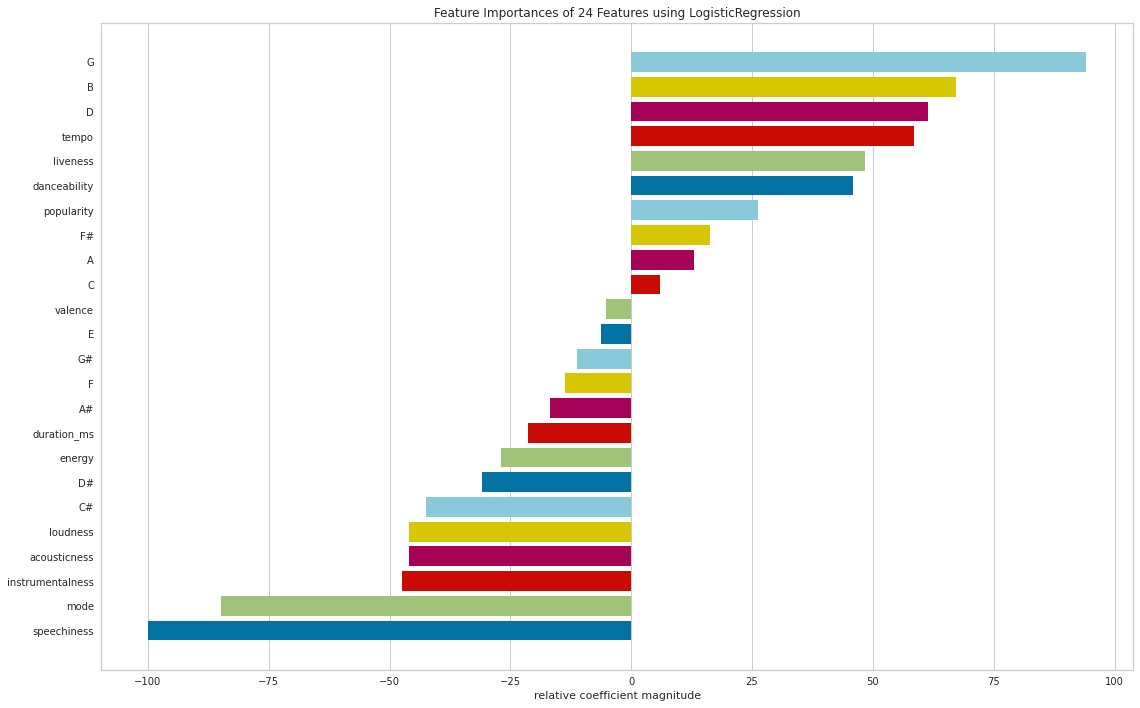

<AxesSubplot:title={'center':'Feature Importances of 24 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [ ]:
import matplotlib.pyplot as plt
from yellowbrick.model_selection import FeatureImportances

plt.figure(figsize=(16,10))
viz = FeatureImportances(LogisticRegression())
viz.fit(X_train, y_train)
viz.show()

In [ ]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

x = tf.keras.layers.Dense(128,activation='relu')(inputs)
x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(9, activation='linear')(x)

model = tf.keras.Model(inputs = inputs, outputs = outputs)

model.compile(
    optimizer='adam',
    loss = 'mse')


history = model.fit(
X_train,
y_train,
epochs=15,
batch_size=32)

print(model.summary())

2022-04-29 17:10:47.170545: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-29 17:10:47.326807: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-29 17:10:47.327612: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-29 17:10:47.328843: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/15
1094/1094 [==============================] - 4s 2ms/step - loss: 4.0469
Epoch 2/15
1094/1094 [==============================] - 2s 2ms/step - loss: 3.3929
Epoch 3/15
1094/1094 [==============================] - 2s 2ms/step - loss: 3.2629
Epoch 4/15
1094/1094 [==============================] - 2s 2ms/step - loss: 3.1738
Epoch 5/15
1094/1094 [==============================] - 2s 2ms/step - loss: 3.0906
Epoch 6/15
1094/1094 [==============================] - 2s 2ms/step - loss: 3.0418
Epoch 7/15
1094/1094 [==============================] - 2s 2ms/step - loss: 2.9750
Epoch 8/15
1094/1094 [==============================] - 2s 2ms/step - loss: 2.9334
Epoch 9/15
1094/1094 [==============================] - 2s 2ms/step - loss: 2.8964
Epoch 10/15
1094/1094 [==============================] - 2s 2ms/step - loss: 2.8597
Epoch 11/15
1094/1094 [==============================] - 2s 2ms/step - loss: 2.8230
Epoch 12/15
1094/1094 [==============================] - 2s 2ms/step - loss: 2.8025
E

In [ ]:
ypred = model.predict(X_test)

print(model.evaluate(X_train, y_train, return_dict=True))

1094/1094 [==============================] - 2s 1ms/step - loss: 2.5908
{'loss': 2.5908403396606445}
